In [495]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [496]:
pd.set_option('display.max_columns', None)

In [497]:
df = pd.read_csv('../data/flats_feature_engg.csv')

In [498]:
df.shape

(2872, 18)

In [499]:
df = df.drop_duplicates(keep='first')

In [500]:
df.shape

(2868, 18)

In [501]:
df.isnull().sum()

society                   0
price                     1
sector                    0
price_per_sqft            1
area                      1
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
extra_rooms               0
floorNum                  0
facing                  811
agePossession             0
super_built_up_area     975
built_up_area          1969
carpet_area            1123
furnishing_type           0
luxury_score              0
dtype: int64

In [502]:
df.columns

Index(['society', 'price', 'sector', 'price_per_sqft', 'area', 'areaWithType',
       'bedRoom', 'bathroom', 'balcony', 'extra_rooms', 'floorNum', 'facing',
       'agePossession', 'super_built_up_area', 'built_up_area', 'carpet_area',
       'furnishing_type', 'luxury_score'],
      dtype='object')

1. Price 

/tmp/ipykernel_11575/2797181776.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])


<Axes: xlabel='price', ylabel='Density'>

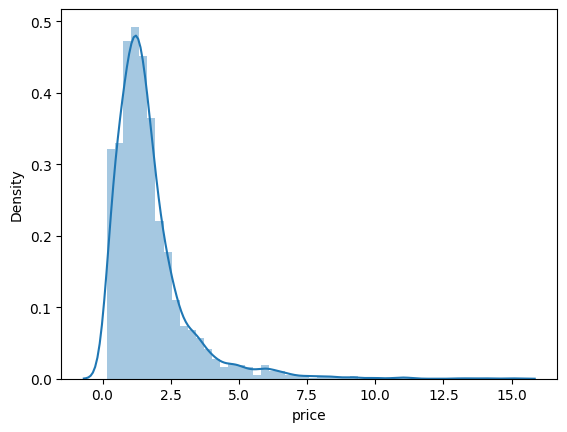

In [503]:
# outliers on the basis of price column
sns.distplot(df['price'])

<Axes: xlabel='price'>

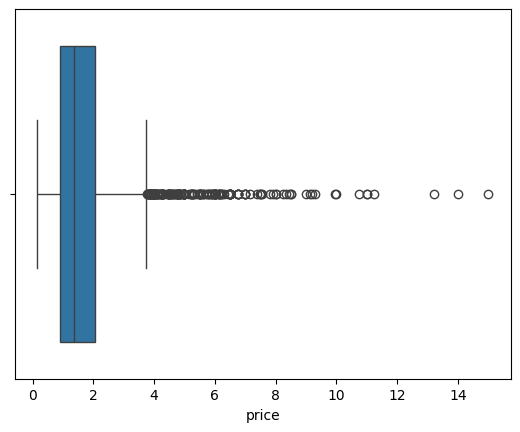

In [504]:
sns.boxplot(x=df['price'])

In [505]:
# Calculate the IQR for the 'price' column
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]

# Displaying the number of outliers and some statistics
num_outliers = outliers.shape[0]
outliers_price_stats = outliers['price'].describe()

num_outliers, outliers_price_stats

(190,
 count    190.000000
 mean       5.654947
 std        1.918374
 min        3.780000
 25%        4.250000
 50%        5.000000
 75%        6.237500
 max       15.000000
 Name: price, dtype: float64)

In [506]:
outliers.sort_values('price',ascending=False).head(20)

,society,price,sector,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,extra_rooms,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,furnishing_type,luxury_score
2184,central park resorts,15.00,sector 48,22388.0,6700.0,Carpet area: 6700 (622.45 sq.m.),5,6,3+,3,17,NaN,Relatively New,NaN,NaN,6700.0,1,45
2541,ambience caitriona,14.00,sector 24,200000.0,700.0,Built Up area: 700 (65.03 sq.m.),4,5,3,0,3,East,Undefined,NaN,700.0,NaN,0,0
1617,m3m golfestate,13.20,sector 65,12000.0,11000.0,Carpet area: 11000 (1021.93 sq.m.),4,4,3,1,13,North,Moderately Old,NaN,NaN,11000.0,0,60
407,central park resorts,11.25,sector 48,28266.0,3980.0,Carpet area: 3980 (369.75 sq.m.),4,5,3+,2,2,North-West,Relatively New,NaN,NaN,3980.0,0,45
2871,dlf the crest,11.00,sector 54,35222.0,3123.0,Super Built up area 3123(290.14 sq.m.),4,6,3,1,7,NaN,Relatively New,3123.0,NaN,NaN,1,125
652,dlf the crest,11.00,sector 54,35483.0,3100.0,Carpet area: 3100 (288 sq.m.),4,5,3+,3,7,North-East,Relatively New,NaN,NaN,3100.0,0,49
1176,pioneer araya,10.75,sector 62,19500.0,5513.0,Super Built up area 5514(512.27 sq.m.),5,7,3,1,10,North-East,Relatively New,5514.0,NaN,NaN,2,153
1278,dlf the belaire,10.00,sector 54,24557.0,4072.0,Super Built up area 4072(378.3 sq.m.)Built Up ...,4,5,3+,1,17,North,Moderately Old,4072.0,3000.0,2800.0,1,167
1857,pioneer araya,9.95,sector 62,20995.0,4739.0,Super Built up area 4739(440.27 sq.m.)Carpet a...,4,6,3,2,12,South-East,Relatively New,4739.0,NaN,3219.0,2,138
1480,central park resorts,9.30,sector 48,24926.0,3731.0,Super Built up area 3931(365.2 sq.m.)Built Up ...,4,4,3+,4,10,North-East,Moderately Old,3931.0,3831.0,3731.0,2,67


Comments: on the basis of price col we can say that there are some genuine outliers but there are some data erros as well

2. Price_per_sqft

/tmp/ipykernel_11575/2186227091.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price_per_sqft'])


<Axes: xlabel='price_per_sqft', ylabel='Density'>

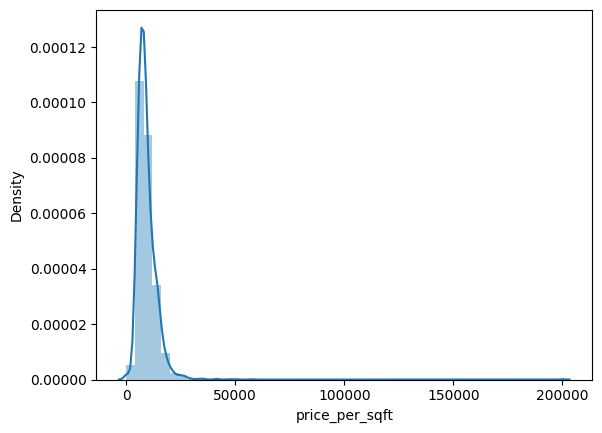

In [507]:
sns.distplot(df['price_per_sqft'])

<Axes: xlabel='price_per_sqft'>

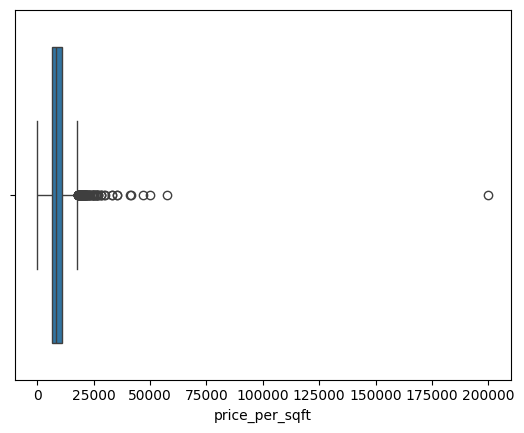

In [508]:
sns.boxplot(x=df['price_per_sqft'])

In [509]:
# Calculate the IQR for the 'price_per_sqft' column
Q1 = df['price_per_sqft'].quantile(0.25)
Q3 = df['price_per_sqft'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers_sqft = df[(df['price_per_sqft'] < lower_bound) | (df['price_per_sqft'] > upper_bound)]

# Displaying the number of outliers and some statistics
num_outliers = outliers_sqft.shape[0]
outliers_sqft_stats = outliers_sqft['price_per_sqft'].describe()

num_outliers, outliers_sqft_stats

(100,
 count       100.000000
 mean      24983.080000
 std       19002.082501
 min       17990.000000
 25%       19000.000000
 50%       20697.000000
 75%       24935.250000
 max      200000.000000
 Name: price_per_sqft, dtype: float64)

In [510]:
df[df['price_per_sqft']>40000].shape

(6, 18)

In [511]:
# Removing the rows which have price_per_sqft > 40000
df = df[df['price_per_sqft'] <= 40000]


<Axes: xlabel='price_per_sqft'>

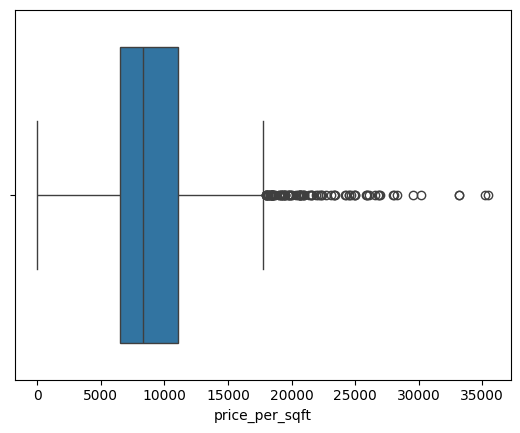

In [512]:
sns.boxplot(x=df['price_per_sqft'])

In [513]:
df.shape

(2861, 18)

3. Area

/tmp/ipykernel_11575/91062565.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['area'])


<Axes: xlabel='area', ylabel='Density'>

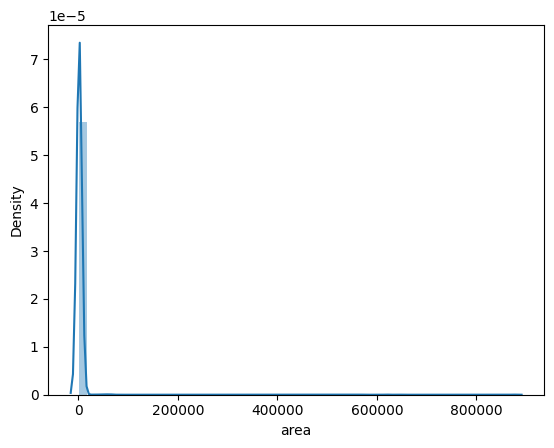

In [514]:
sns.distplot(df['area'])

<Axes: xlabel='area'>

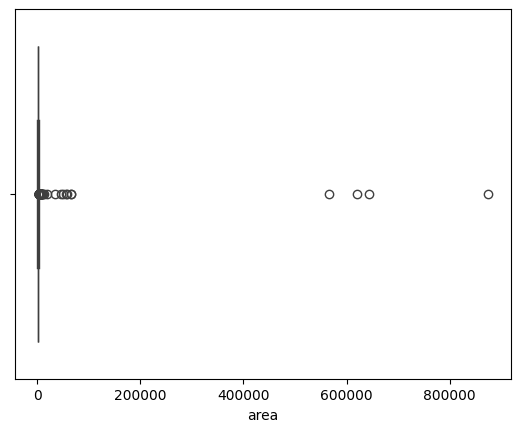

In [515]:
sns.boxplot(x=df['area'])

In [516]:
df['area'].describe()

count      2861.000000
mean       2840.615869
std       25731.176840
min         250.000000
25%        1250.000000
50%        1671.000000
75%        2132.000000
max      875000.000000
Name: area, dtype: float64

In [517]:
df[df['area'] > 15000].shape

(12, 18)

In [518]:
# Removing areas greater than 15000 sqft
df = df[df['area'] < 15000]

/tmp/ipykernel_11575/91062565.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['area'])


<Axes: xlabel='area', ylabel='Density'>

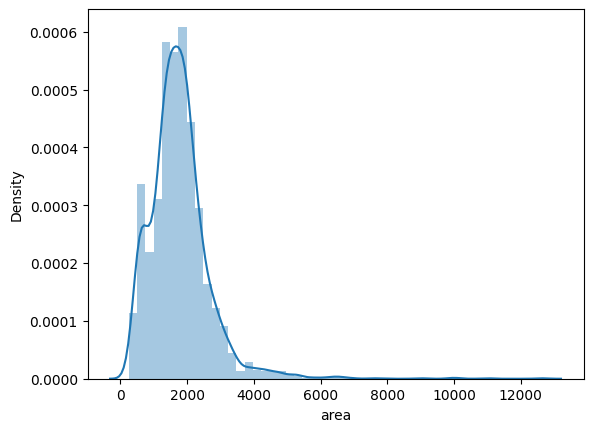

In [519]:
sns.distplot(df['area'])

<Axes: xlabel='area'>

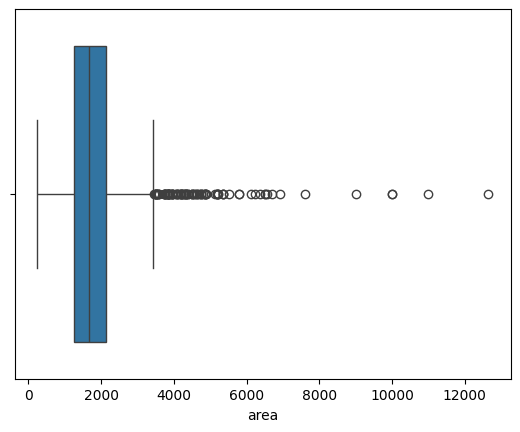

In [520]:
sns.boxplot(x=df['area'])

4. Bedroom

/tmp/ipykernel_11575/1691983684.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bedRoom'])


<Axes: xlabel='bedRoom', ylabel='Density'>

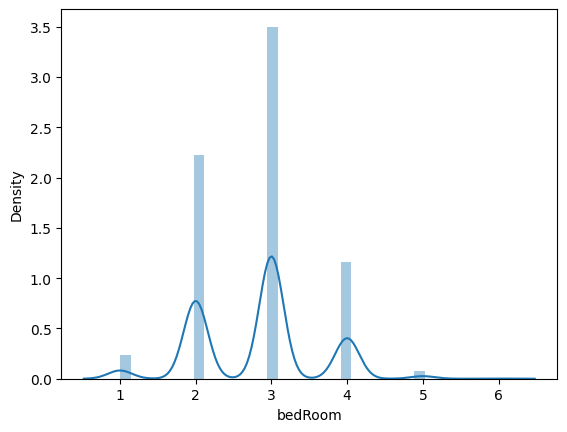

In [521]:
sns.distplot(df['bedRoom'])

<Axes: xlabel='bedRoom'>

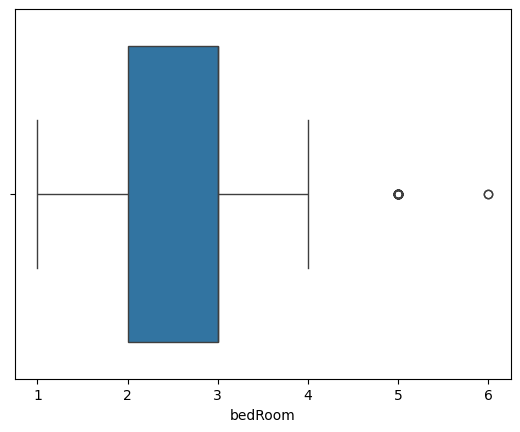

In [522]:
sns.boxplot(x=df['bedRoom'])

In [523]:
df['bedRoom'].describe()

count    2849.000000
mean        2.809056
std         0.782114
min         1.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         6.000000
Name: bedRoom, dtype: float64

Comment: Bedroom column seems ok

5. Bathroom

/tmp/ipykernel_11575/2904465235.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bathroom'])


<Axes: xlabel='bathroom', ylabel='Density'>

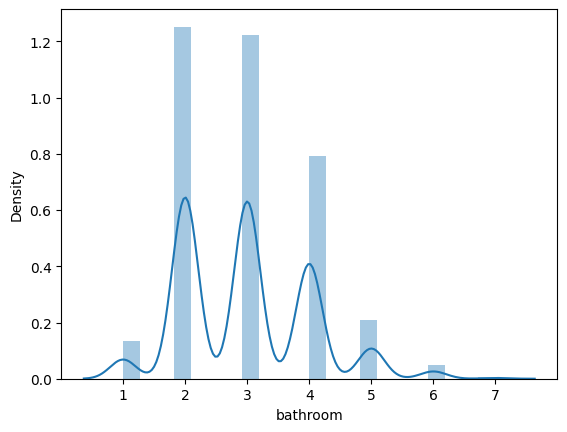

In [524]:
sns.distplot(df['bathroom'])

<Axes: xlabel='bathroom'>

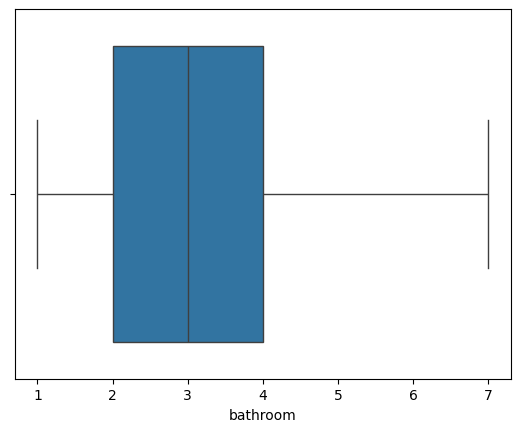

In [525]:
sns.boxplot(x=df['bathroom'])

In [526]:
df['bathroom'].describe()

count    2849.000000
mean        2.963145
std         1.036743
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         7.000000
Name: bathroom, dtype: float64

Comment: Bathroom column also seems ok

6. Super Built up Area

In [527]:
df.shape

(2849, 18)

/tmp/ipykernel_11575/4184943455.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['super_built_up_area'])


<Axes: xlabel='super_built_up_area', ylabel='Density'>

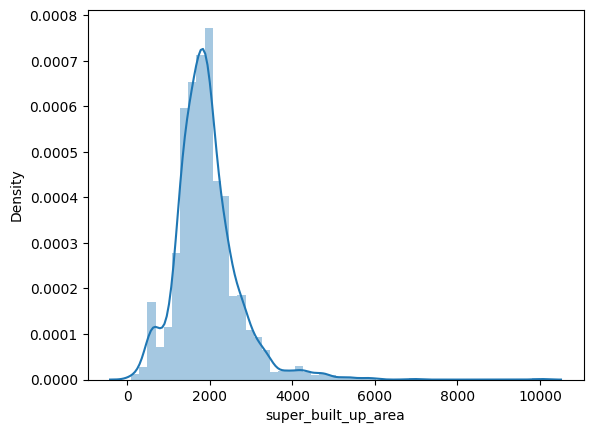

In [528]:
sns.distplot(df['super_built_up_area'])

<Axes: xlabel='super_built_up_area'>

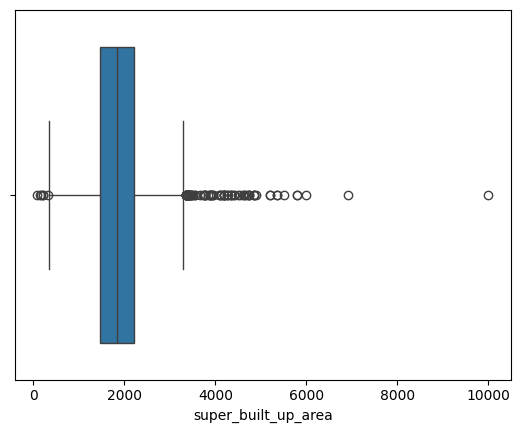

In [529]:
sns.boxplot(x=df['super_built_up_area'])

In [530]:
df['super_built_up_area'].describe()

count     1893.000000
mean      1920.915240
std        765.408479
min         89.000000
25%       1465.000000
50%       1828.000000
75%       2215.000000
max      10000.000000
Name: super_built_up_area, dtype: float64

In [531]:
df[df['super_built_up_area'] > 6000]

,society,price,sector,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,extra_rooms,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,furnishing_type,luxury_score
651,krrish provence estate,7.5,gwal pahari,7500.0,10000.0,Super Built up area 10000(929.03 sq.m.),5,6,3+,3,23,North-East,Relatively New,10000.0,NaN,NaN,0,49
1523,bestech park view grand spa,4.7,sector 81,6786.0,6926.0,Super Built up area 6926(643.45 sq.m.),4,4,3+,1,19,North,Relatively New,6926.0,NaN,NaN,2,140


Comment: these two rows seems ok

7. Built up Area

/tmp/ipykernel_11575/3494228458.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['built_up_area'])


<Axes: xlabel='built_up_area', ylabel='Density'>

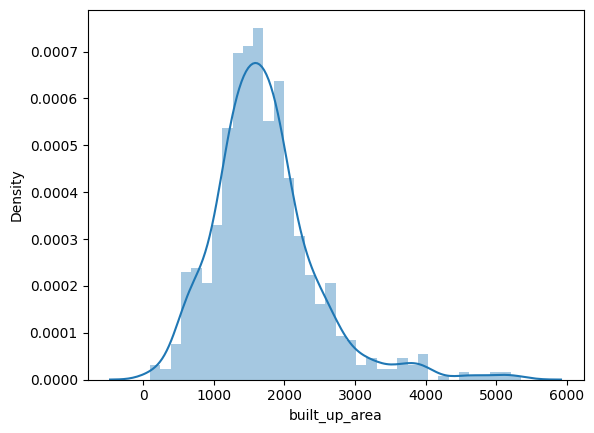

In [532]:
sns.distplot(df['built_up_area'])

<Axes: xlabel='built_up_area'>

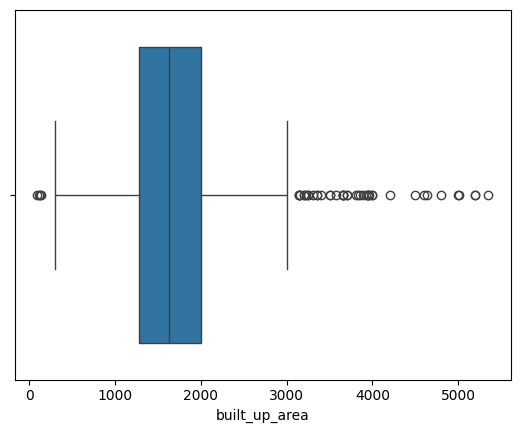

In [533]:
sns.boxplot(x=df['built_up_area'])

In [534]:
df[df['built_up_area'] > 10000]

,society,price,sector,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,extra_rooms,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,furnishing_type,luxury_score


Comment: built_up_area column seems ok

8. Carpet Area

/tmp/ipykernel_11575/3905767603.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['carpet_area'])


<Axes: xlabel='carpet_area', ylabel='Density'>

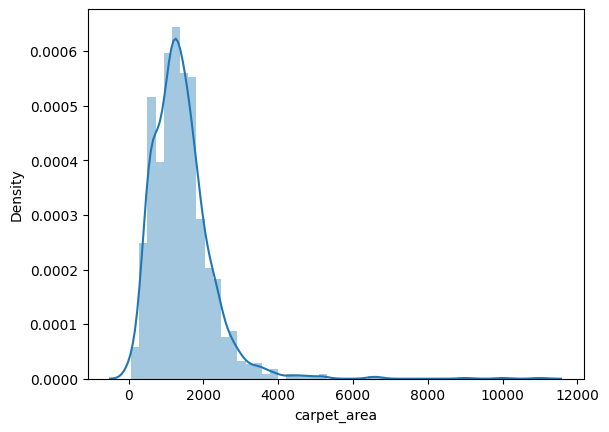

In [535]:
sns.distplot(df['carpet_area'])

<Axes: xlabel='carpet_area'>

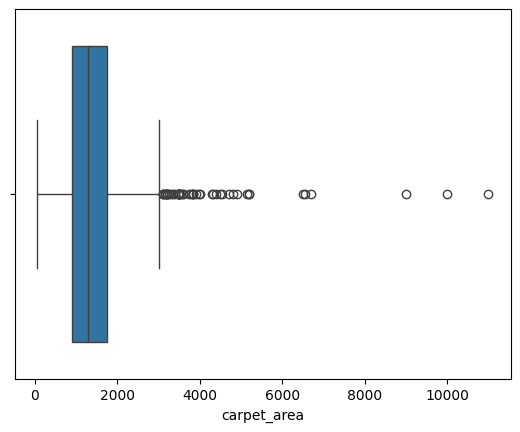

In [536]:
sns.boxplot(x=df['carpet_area'])

In [537]:
df[df['carpet_area'] > 10000]

,society,price,sector,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,extra_rooms,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,furnishing_type,luxury_score
1617,m3m golfestate,13.2,sector 65,12000.0,11000.0,Carpet area: 11000 (1021.93 sq.m.),4,4,3,1,13,North,Moderately Old,NaN,NaN,11000.0,0,60


9. Luxury Score

/tmp/ipykernel_11575/3385064764.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['luxury_score'])


<Axes: xlabel='luxury_score', ylabel='Density'>

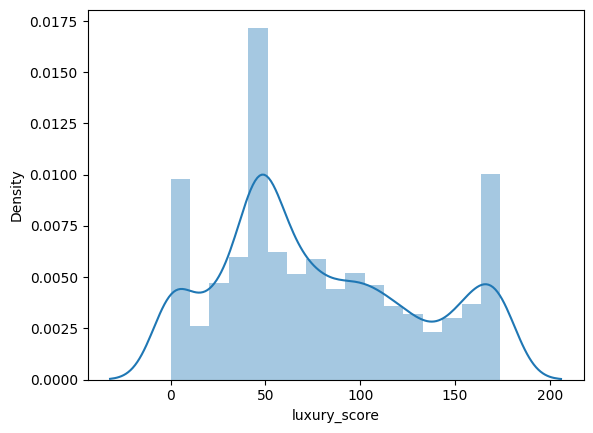

In [538]:
sns.distplot(df['luxury_score'])

<Axes: ylabel='luxury_score'>

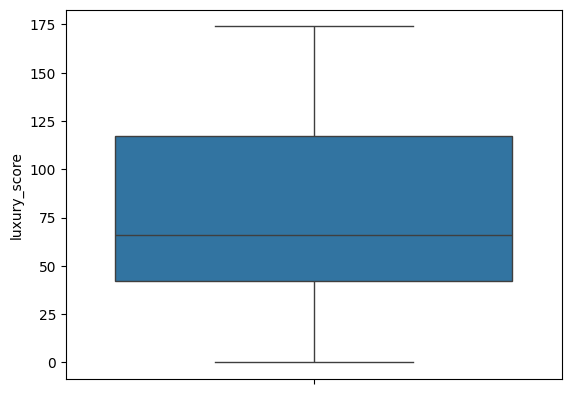

In [539]:
sns.boxplot(df['luxury_score'])

In [540]:
df.shape

(2849, 18)

In [541]:
# Recalculating price_per_sqft column since area has changed for few rows
df['price_per_sqft'] = round((df['price']*10000000)/df['area'])

/tmp/ipykernel_11575/2186227091.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price_per_sqft'])


<Axes: xlabel='price_per_sqft', ylabel='Density'>

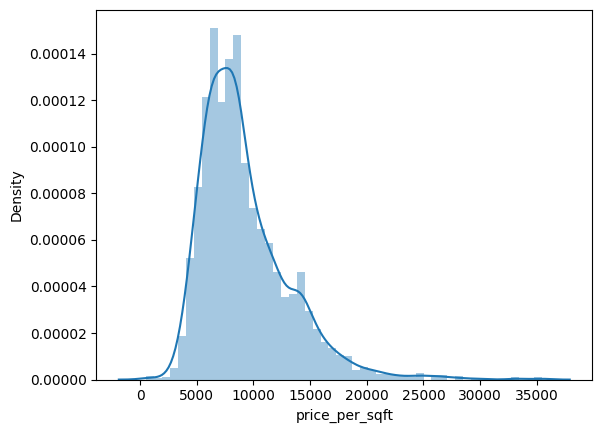

In [542]:
sns.distplot(df['price_per_sqft'])

<Axes: ylabel='price_per_sqft'>

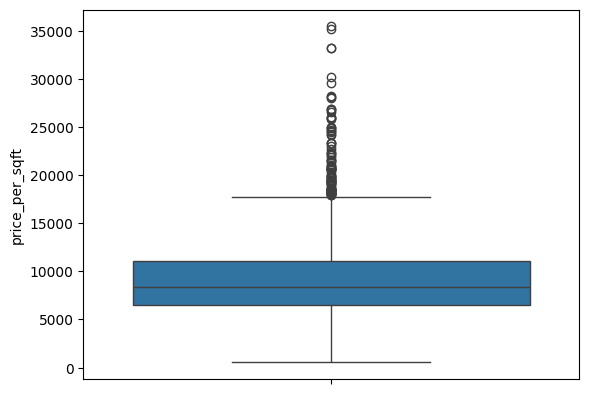

In [543]:
sns.boxplot(df['price_per_sqft'])

In [544]:
x = df[df['price_per_sqft'] <= 20000]

In [545]:
# Top 0.1 percentile of data where price_per_sqft <= 20k and area/bedroom 
(x['area']/x['bedRoom']).quantile(0.001)

np.float64(213.33333333333334)

In [546]:
df[(df['area']/df['bedRoom'])<213]

,society,price,sector,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,extra_rooms,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,furnishing_type,luxury_score
119,czar mahira homes 63a,0.42,sector 63a,7407.0,567.0,Carpet area: 567 (52.68 sq.m.),3,2,2,0,1,NaN,Undefined,NaN,NaN,567.0,0,0
2367,breez global heights 88a,0.50,sector 88a,8375.0,597.0,Carpet area: 597 (55.46 sq.m.),3,2,2,0,2,NaN,Under Construction,NaN,NaN,597.0,0,15


Comments: These rows still seems ok

In [547]:
df.shape

(2849, 18)

In [548]:
df.isnull().sum()

society                   0
price                     0
sector                    0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
extra_rooms               0
floorNum                  0
facing                  805
agePossession             0
super_built_up_area     956
built_up_area          1955
carpet_area            1118
furnishing_type           0
luxury_score              0
dtype: int64

In [549]:
df.to_csv("../data/flats_outlier_treated.csv", index=False)